In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import st_remux as st

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



%matplotlib inline

Using TensorFlow backend.
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/trial_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/trial_env/l

In [2]:
# Config
# highpath = 'datasets/high.csv'
# lowpath = 'datasets/none.csv'
# hi = st.raw_to_arr(high, fs, win_len, 0)
# lo = st.raw_to_arr(low, fs, win_len, 0)
first_class = 'data_for_cnn/0'
second_class = 'data_for_cnn/1'
third_class = 'data_for_cnn/2'
fourth_class = 'data_for_cnn/3'
fifth_class= 'data_for_cnn/4'



fs = 4000
win_len = 40

use_filter = 0   # weird results if we use python filtering

use_matlab_backend = 0

In [3]:
# high = np.genfromtxt(highpath, delimiter=',')
# low = np.genfromtxt(lowpath, delimiter=',')

In [4]:
if use_matlab_backend:
    print('Using MATLAB signal processing backend')
    # high_dir = 'datasets/high/'
    # low_dir = 'datasets/low/'

    high_dir = 'C:/Users/Geoffrey/Documents/MATLAB/S transform time frequency/high/'
    low_dir = 'C:/Users/Geoffrey/Documents/MATLAB/S transform time frequency/low/'

    def generate_3darray(directory):
        files = os.listdir(directory)
        dims = np.genfromtxt(directory + files[0], delimiter=',').shape
        length = len(files)
        arr = np.zeros((length, dims[0], dims[1]))

        for idx, val in enumerate(files):
            arr[idx] = np.genfromtxt(directory + val, delimiter=',')

        return arr

    hi = generate_3darray(high_dir)
    lo = generate_3darray(low_dir)
    
else: 
    print('Using native backend')
    zero = st.raw_to_arr(first_class, fs, win_len, 0)
    one = st.raw_to_arr(second_class, fs, win_len, 0)
    two = st.raw_to_arr(third_class, fs, win_len, 0)
    three = st.raw_to_arr(fourth_class, fs, win_len, 0)
    four = st.raw_to_arr(fifth_class, fs, win_len, 0)



Using native backend
['RAW.csv']
ydim=16 xdim=40
['RAW.csv']
ydim=16 xdim=40
['RAW.csv']
ydim=16 xdim=40
['RAW.csv']
ydim=16 xdim=40
['RAW.csv']
ydim=16 xdim=40


In [5]:
X = np.concatenate((zero, one, two, three, four))
d= X.shape
print(d)

four_Y = np.ones(len(four), dtype=int) * 4
three_Y = np.ones(len(three), dtype=int) * 3
two_Y = np.ones(len(two), dtype=int) * 2
one_Y = np.ones(len(one), dtype=int) * 1
zero_Y = np.zeros(len(zero), dtype=int)

Y = np.concatenate((four_Y, three_Y, two_Y, one_Y, zero_Y))

(152100, 16, 40)


In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

In [7]:
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (121680, 16, 40) (121680,)
Testing data shape:  (30420, 16, 40) (30420,)


In [8]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  5
Output classes:  [0 1 2 3 4]


Text(0.5,1,'Ground Truth: 1')

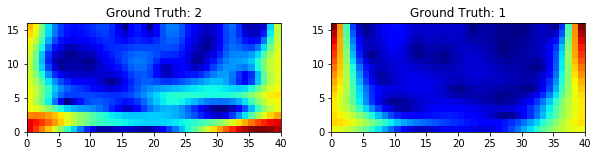

In [9]:
plt.figure(figsize=[10,2])

# Display first image in training set
plt.subplot(121)
plt.pcolormesh(train_X[0,:,:], cmap='jet')
plt.title("Ground Truth: {}".format(train_Y[0]))

# Display second image in testing set
plt.subplot(122)
plt.pcolormesh(test_X[1], cmap='jet')
plt.title("Ground Truth: {}".format(test_Y[1]))

In [10]:
ydim = train_X[0].shape[0]
xdim = train_X[0].shape[1]
train_X = train_X.reshape(-1, ydim, xdim, 1)
test_X = test_X.reshape(-1, ydim, xdim, 1)
train_X.shape, test_X.shape

((121680, 16, 40, 1), (30420, 16, 40, 1))

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [12]:
# Change labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# See the difference?
print('Original label: ', train_Y[0])
print('After conversion to one-hot: ', train_Y_one_hot[0])

Original label:  2
After conversion to one-hot:  [0. 0. 1. 0. 0.]


In [13]:
train_Y_one_hot.shape

(121680, 5)

In [14]:
# Partition data for 80% training and 20% validation
# should reduce overfitting and boost test performance

train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((97344, 16, 40, 1), (24336, 16, 40, 1), (97344, 5), (24336, 5))

In [15]:
# let's get down to business
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [16]:
# Parameters
batch_size = 64
epochs = 50
num_classes = nClasses

In [17]:
emg_model = Sequential()
emg_model.add(
    Conv2D(
        32, 
        kernel_size=(3, 3), 
        activation='linear', 
        input_shape=(ydim, xdim, 1), 
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
emg_model.add(Dropout(0.25))
emg_model.add(
    Conv2D(
        64,
        (3, 3),
        activation='linear',
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
emg_model.add(Dropout(0.25))
emg_model.add(
    Conv2D(
        128,
        (3, 3),
        activation='linear',
        padding='same'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
emg_model.add(Dropout(0.4))
emg_model.add(Flatten())
emg_model.add(Dense(128, activation='linear'))
emg_model.add(LeakyReLU(alpha=0.1))
emg_model.add(Dropout(0.3))
emg_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
emg_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

In [19]:
emg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 40, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 40, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 20, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 20, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 20, 64)         18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 20, 64)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 10, 64)        

In [21]:
emg_train = emg_model.fit(
    train_X,
    train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label))

Train on 97344 samples, validate on 24336 samples
Epoch 1/50
97344/97344 [==============================] - 155s 2ms/step - loss: 1.1588 - accuracy: 0.4585 - val_loss: 1.1645 - val_accuracy: 0.4516
Epoch 2/50
97344/97344 [==============================] - 149s 2ms/step - loss: 1.1568 - accuracy: 0.4578 - val_loss: 1.1613 - val_accuracy: 0.4523
Epoch 3/50
97344/97344 [==============================] - 146s 1ms/step - loss: 1.1565 - accuracy: 0.4579 - val_loss: 1.1878 - val_accuracy: 0.4470
Epoch 4/50
97344/97344 [==============================] - 152s 2ms/step - loss: 1.1549 - accuracy: 0.4608 - val_loss: 1.1599 - val_accuracy: 0.4515
Epoch 5/50
97344/97344 [==============================] - 158s 2ms/step - loss: 1.1550 - accuracy: 0.4597 - val_loss: 1.1562 - val_accuracy: 0.4552
Epoch 6/50
97344/97344 [==============================] - 161s 2ms/step - loss: 1.1566 - accuracy: 0.4587 - val_loss: 1.1715 - val_accuracy: 0.4509
Epoch 7/50
97344/97344 [==============================] - 166s

In [22]:
test_eval = emg_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [23]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  1.1632816546689047
Test accuracy:  0.44967126846313477


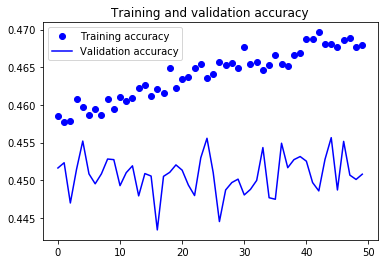

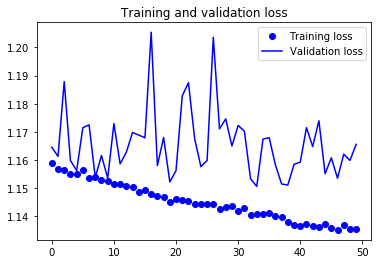

In [24]:
# Visualization
accuracy = emg_train.history['accuracy']
val_accuracy = emg_train.history['val_accuracy']
loss = emg_train.history['loss']
val_loss = emg_train.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
emg_train_dropout = emg_model.fit(
    train_X,
    train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label))

In [ ]:
# emg_model.save("emg_model_dropout_new.h5py")

In [ ]:
test_eval= emg_model.evaluate(test_X, test_Y_one_hot, verbose=1)

In [ ]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

In [ ]:
# Visualization
accuracy = emg_train_dropout.history['accuracy']
val_accuracy = emg_train_dropout.history['val_accuracy']
loss = emg_train_dropout.history['loss']
val_loss = emg_train_dropout.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = emg_model.predict(test_X)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [ ]:
predicted_classes.shape, test_Y.shape

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct, in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(test_X[correct].reshape(ydim, xdim), cmap='jet')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect, in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(test_X[incorrect].reshape(ydim, xdim), cmap='jet')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))